<a href="https://colab.research.google.com/github/echou024/BostonHousingDatasetLinearRegression/blob/main/BostonHousingDatasetLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard library imports.
import random as rand

# Related third party imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Local application/library specific imports.
# import here if you write .py script

We will implement linear regression using direct solution and gradient descent with the Boston housing dataset.

We will first attempt to predict output using a single attribute/feature. Then we will perform linear regression using multiple attributes/features.

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc. The raw data and a complete description of the dataset can be found on the UCI website:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

or

http://www.ccs.neu.edu/home/vip/teach/MLcourse/data/housing_desc.txt

In [2]:
names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In order to properly test linear regression, we first need to find a set of correlated variables, so that we use one to predict the other. Consider the following scatterplots:

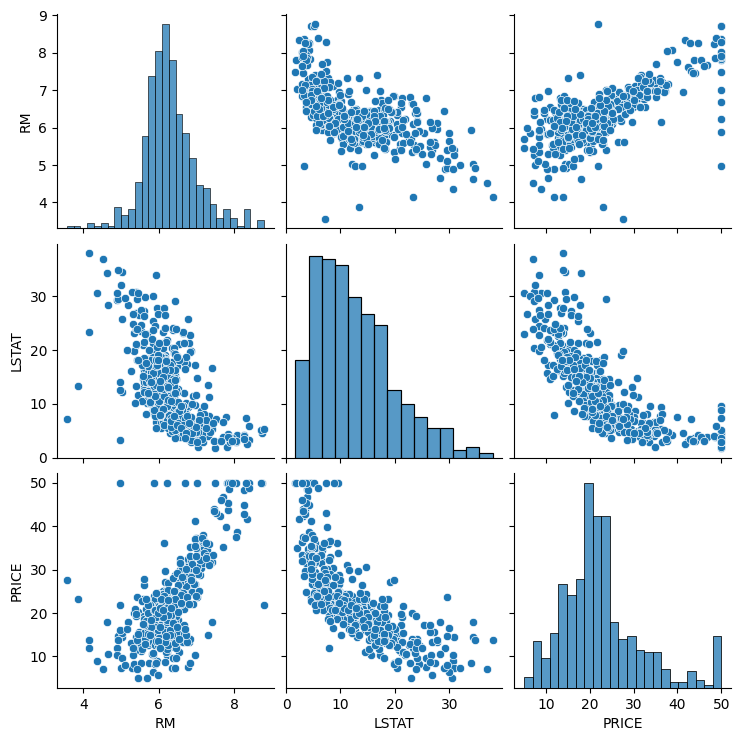

In [3]:
# RM - average number of rooms per dwelling
# LSTAT - % lower status of the population

sns.pairplot(df[['RM','LSTAT','PRICE']])

Here is a response vector `y` with the values in the column `PRICE`.  The vector `y` is a 1D `numpy.array` structure.

In [4]:
# TODO
y = df['PRICE'].to_numpy()
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

We use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k.

In [5]:
# TODO

# mean house price:
mean = np.mean(y)
print(f"The mean house price is {mean} thousands of dollars.")


# fraction of homes above $40K:
above40K = 0

for housePrice in y:
  if housePrice > 40:
    above40K+=1


above40KPercent = (above40K / len(y))*100

print(f"Only {above40KPercent} percent are above $40k.")


The mean house price is 22.532806324110677 thousands of dollars.
Only 6.126482213438735 percent are above $40k.


In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, we create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each region.

In [7]:
# TODO
x = df['RM'].to_numpy()
print(x)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

Text(0, 0.5, 'House Price (in thousands)')

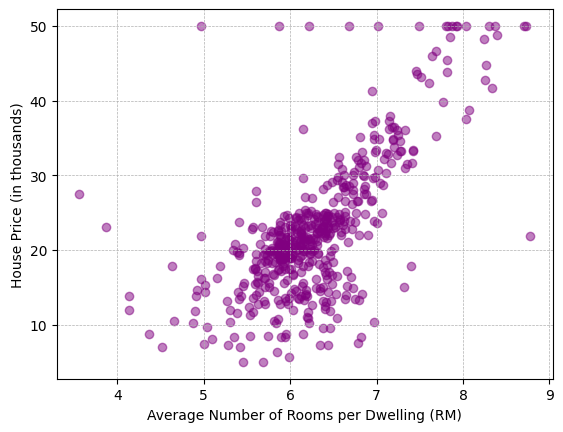

In [8]:
# TODO

plt.scatter(x, y, color='purple', alpha=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('House Price (in thousands)')


The number of rooms and price seem to have a linear trend, so let us try to predict price using number of rooms first.

**Derivation of a simple linear model for a single feature:**

Suppose we have $N$ pairs of training samples $(x_1,y_1),\ldots, (x_N,y_N)$, where $x_i \in \mathbb{R}$ and $y_i \in \mathbb{R}$.

We want to perform a linear fit for this 1D data as
$$y = wx+b,$$
where $w\in \mathbb{R}$ and $b\in \mathbb{R}$.

The squared loss function can be written as  $$L(w) = \sum_{i=1}^N(w x_i -y_i)^2,$$ and the optimal value of $w*$ that minimizes $L(w)$ can be written as $$w^* = (\sum_{i=1}^N x_i^2)^{-1}(\sum_{i=1}^N x_i y_i)$$.


Now let us include $b$ in our model. We want to show that the optimal values of $w^*,b^*$ that minimize the loss function
$$L(w,b) = \sum_{i=1}^N(wx_i + b -y_i)^2$$
can be written as
$$w^* = (\sum_i (x_i - \bar{x})^2)^{-1}(\sum_i (x_i-\bar{x})(y_i-\bar{y}))$$
and $$b^* = \bar{y} - w^*\bar{x},$$
where $\bar{x} = \frac{1}{N}\sum_i x_i, \bar{y} = \frac{1}{N}\sum_i y_i$ are mean values of $x_i,y_i$, respectively.






Derivation:

\begin{align*}
1. & \text{ Differentiate with respect to } w: \\
\frac{\partial L}{\partial w} & = 2 \sum_{i=1}^{N} (w x_i + b - y_i)(x_i)
\end{align*}

\begin{align*}
2. & \text{ Set } \frac{\partial L}{\partial w} = 0: \\
2 \sum_{i=1}^{N} (w x_i + b - y_i)(x_i) & = 0
\end{align*}

\begin{align*}
3. & \text{ Differentiate with respect to } b: \\
\frac{\partial L}{\partial b} & = 2 \sum_{i=1}^{N} (w x_i + b - y_i)
\end{align*}

\begin{align*}
4. & \text{ Set } \frac{\partial L}{\partial b} = 0: \\
\sum_{i=1}^{N} (w x_i + b - y_i) & = 0
\end{align*}

\begin{align*}
5. & \text{ Divide both sides by } N: \\
\frac{\sum_{i=1}^{N} w x_i}{N} + b - \frac{\sum_{i=1}^{N} y_i}{N} & = 0 \\
\bar{w x} + b - \bar{y} & = 0
\end{align*}

\begin{align*}
6. &\text{ Solve for } b^*: \\
b^* & = \bar{y} - \bar{w x}
\end{align*}

\begin{align*}
7. & \text{ Plug } b^* \text{ into } \frac{\partial L}{\partial w} = 0: \\
\sum_{i=1}^{N} (w x_i + \bar{y} - \bar{w x} - y_i)(x_i) & = 0
\end{align*}

\begin{align*}
8. & \text{ Express numerator as covariance: } \\
\sum_{i=1}^{N} y_i x_i - \bar{y} \sum_{i=1}^{N} x_i & = \sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})
\end{align*}

\begin{align*}
9. & \text{ Express denominator in terms of variance of } x: \\
\sum_{i=1}^{N} x_i^2 - \bar{x}\sum_{i=1}^{N} x_i & = \sum_{i=1}^{N} (x_i - \bar{x})^2
\end{align*}

\begin{align*}
10. & \text{ Derivation for } w^*: \\
w^* & = \frac{\sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{N} (x_i - \bar{x})^2}
\end{align*}

**Fitting a linear model using a single feature:**

Next we will write a function to perform a linear fit using the formula above to compute the parameters $w,b$ in the linear model $y = wx + b$.

In [9]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = w*x + b,
    The function returns w and b
    """
    # TODO complete the code below

    meanX = sum(x) / len(x)
    meanY = sum(y) / len(y)

    numerator = sum([(i - meanX) * (j - meanY) for i, j in zip(x, y)])

    denominator = sum([(i - meanX)**2 for i in x])

    w = numerator / denominator
    b = meanY - (w * meanX)

    return w, b

In [10]:
# TODO
w, b = fit_linear(x,y)
print('w = {0:5.1f}, b = {1:5.1f}'.format(w,b))

w =   9.1, b = -34.7


OBSERVATION:

* The price increases with the number of rooms.

This is the replotted scatter plot above, but now with the regression line:

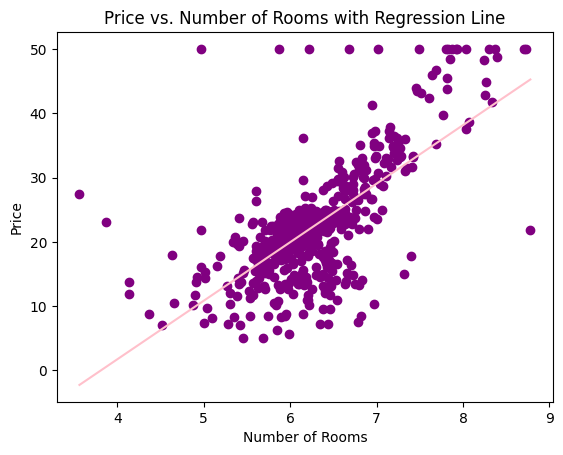

In [11]:
# TODO
# Points on the regression line

# creating points xp from min(x) to max(x)
xp = np.linspace(min(x), max(x), 100)

# computing the linear predicted values
yp = w * xp + b

# plotting yp vs. xp on top of the above plot
plt.scatter(x, y, color='purple', label='Data points')
plt.plot(xp, yp, color='pink', label='Regression line')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Price vs. Number of Rooms with Regression Line')
plt.show()





**Linear regression with multiple features/attributes:**

One possible way to try to improve the fit is to use multiple variables at the same time.

The target variable will be the `PRICE`.  We will use multiple attributes of the house to predict the price.  

The names of all the data attributes are given in variable `names`.
* We can get the list of names of the columns from `df.columns.tolist()`.  
* Remove the last items from the list using indexing.

In [12]:
xnames = names[:-1]
print(names[:-1])

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


Let us use `CRIM`, `RM`, and `LSTAT` to predict `PRICE`.




In [13]:
# TODO
X = np.array(df[['CRIM', 'RM', 'LSTAT']])
y = np.array(df[['PRICE']])


print(y)

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


**Linear regression by solving least-squares problem (direct solution):**

Suppose we have $N$ pairs of training samples $(x_1,y_1),\ldots, (x_N,y_N)$, where $\mathbf{x}_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$.

We want to perform a linear fit over all the data features as
$$y = \mathbf{\tilde w}^T\mathbf{x}+b,$$
where $\mathbf{\tilde w}\in \mathbb{R}^d$ and $b\in \mathbb{R}$.

We can write all the training data as a linear system
$$ \begin{bmatrix} y_1 \\ \vdots \\ y_N \end{bmatrix} = \begin{bmatrix} - & \mathbf{x}_1^T & - \\
& \vdots & \\
- & \mathbf{x}_N^T& - \end{bmatrix} \mathbf{\tilde w} + b, $$
which can be written as
$$ \begin{bmatrix} y_1 \\ \vdots \\ y_N \end{bmatrix} = \begin{bmatrix} 1 & \mathbf{x}_1^T \\
\vdots & \vdots \\
1 & \mathbf{x}_N^T\end{bmatrix} \begin{bmatrix} b \\ \mathbf{\tilde w} \end{bmatrix}.$$

Let us write this system of linear equations in a compact form as
\begin{equation}
\mathbf{y} = \mathbf{X}\mathbf{w},
\end{equation}
where $\mathbf{X}$ is an $N \times d+1$ matrix whose first column is all ones and $\mathbf{w}$ is a vector of length $d+1$ whose first term is the constant and rest of them are the coefficients of the linear model.

The least-squares problem for the system above can be written as
$$\text{minimize}\; \frac{1}{2}\|\mathbf{y} - \mathbf{X}\mathbf{w}\|_2^2$$
for which the closed form solution can be written as
$$\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}.$$

In [14]:
# TODO
# your code here

# append a column of ones onto data matrix
ones_vector = np.ones((X.shape[0], 1))
X = np.hstack((ones_vector, X))

**Split the Data into Training and Test**

Split the data into training and test.  Use 30% for test and 70% for training.

In [15]:
from sklearn.model_selection import train_test_split

# TODO
# your code here
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.30)


Compute the coefficients $\mathbf{w}$ using `Xtr,ytr` via the direct matrix inverse: $$\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}.$$


In [16]:
# TODO
# compute w using the direct solution equation

# Compute the matrix products
XTX = Xtr.T @ Xtr
XTy = Xtr.T @ ytr


# Compute the inverse of XTX
XTX_inv = np.linalg.inv(XTX)

# Compute the coefficients w
w = XTX_inv @ XTy

The average square loss value on the training data:

In [17]:
# TODO
# your code here

yhat_tr = Xtr @ w

averageSquareLossTr = np.mean((yhat_tr - ytr)**2)

print(f'average square loss value on the training data: {averageSquareLossTr}')


average square loss value on the training data: 28.697184731790934


Scatter plot of the actual vs. predicted values of `y` on the training data:

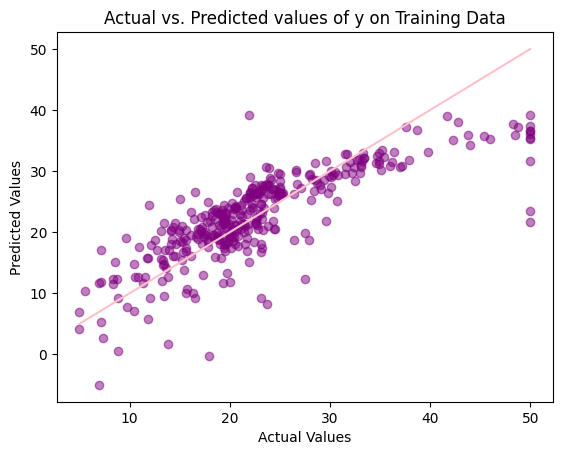

In [18]:
# TODO
# your code here
plt.scatter(ytr, yhat_tr, color='purple', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted values of y on Training Data')
plt.plot([min(ytr), max(ytr)], [min(ytr), max(ytr)], color='pink')
plt.show()

The average square loss value on the test data:

In [19]:
# TODO
# your code here

yhat_ts = Xts @ w

averageSquareLossTs = np.mean((yhat_ts - yts)**2)

print(f'average square loss value on the test data: {averageSquareLossTs}')



average square loss value on the test data: 32.80162259163657


Scatter plot of the actual vs. predicted values of `y` on the test data:

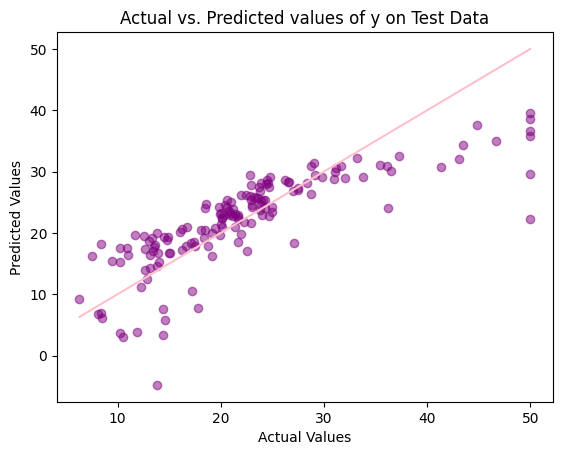

In [20]:
# TODO
# your code here
plt.scatter(yts, yhat_ts, color='purple', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted values of y on Test Data')
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], color='pink')
plt.show()


**Gradient descent for linear regression:**

Where `X` is the same data matrix used above (with ones column appended), `y` is the variable to be predicted, `learning_rate` is the learning rate used ($\alpha$), `max_iter` defines the maximum number of iterations that gradient descent is allowed to run, and `tol` is defining the tolerance for convergence.

The return values for the above function are 1) `w` which are the regression parameters, 2) `all_cost` which is an array where each position contains the value of the objective function $L(\mathbf{w})$ for a given iteration, 3) `iters` which counts how many iterations did the algorithm need in order to converge to a solution.

Gradient descent is an iterative algorithm; it keeps updating the variables until a convergence criterion is met. In our case, our convergence criterion is whichever of the following two criteria happens first:

- The maximum number of iterations is met
- The relative improvement in the cost is not greater than the tolerance we have specified.

Gradient can be computed as $$\nabla_\mathbf{w}L = \mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathbf{y}).$$

Estimate will be updated as $\mathbf{w} \gets \mathbf{w} - \alpha \nabla_\mathbf{w}L$ at every iteration.

In [21]:
# TODO
# Implement gradient descent for linear regression

def compute_cost(X,w,y):
    # your code for the loss function goes here

    # num of columns = num of rows
    # X: (506, 4)
    # w: (4, 1)
    # y: (506, 1)

    predictedY = X @ w  # (506, 4) @ (4, 1) = (506, 1)

    predictedDiff = predictedY - y

    square_errors = predictedDiff ** 2

    L = np.sum(square_errors)

    return L

def linear_regression_gd(X, y, learning_rate = 0.00001, max_iter=10000,tol=pow(10,-5)):
    # your code goes here
    all_cost = []
    iters = 0
    w = np.zeros(4).reshape(4,1) # w: (4, 1)

    # Compute the cost
    current_cost = compute_cost(X, y, w)
    all_cost.append(current_cost)
    gradient = ((X.T) @ (X @ w - y))
    w = w - learning_rate * gradient # update estimate

    for i in range(max_iter):

        # Compute the cost
        current_cost = compute_cost(X, y, w)
        all_cost.append(current_cost)
        gradient = ((X.T) @ (X @ w - y)) # gradient (4, 506) @ (506, 1) = (4, 1)
        w = w - learning_rate * gradient # update estimate

        # Check for convergence
        if np.absolute(all_cost[iters] - all_cost[iters-1])/all_cost[iters-1] <= tol:
          current_cost = compute_cost(X, y, w)
          all_cost.append(current_cost)
          gradient = ((X.T) @ (X @ w - y)) # gradient (4, 506) @ (506, 1) = (4, 1)
          w = w - learning_rate * gradient # update estimate

    return w, all_cost, iters




